# Dual blocker therapy (DBT) plasma proteome Paper — Figure 3

This Jupyter Notebook (with Python 3 kernel) contained the code for the  analysis of clinical indicators between disease non-progressive (DNP) and disease progressive (DP).

Input files:  
* The clinical file: category.csv, continuous.csv
* The DBT proteome file: dbt.csv
* The DBT proteome-based ssGSEA score: ssgsea.csv

Output figures:  
* Figure 3, Figure S4

In [1]:
from utils import *
paths = ['../figure/figure3', '../documents/figure3']
for path in paths:
    if not os.path.isdir(path):
        os.makedirs(path)

a = Analysis('../')

### Clinical indicators between DNP and DP

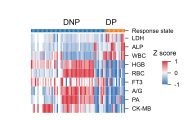

In [2]:
term = ['LDH', 'ALP', 'WBC', 'HGB', 'RBC', 'FT3', 'A/G', 'PA', 'CK-MB']
a.set_param('group', dataset_type='continuous', group_name='Response state', file_type='category', thresh=.3, ttest_kwargs={'permutations': 10000, 'random_state': 94})
a.table.to_csv('../documents/figure3/continuous_clinical_indicator_DNP-DP_table.csv')

fig = a.heat(term, figsize=(2.5, 1.8), cmap=RB_CMAP, legend=False, cbar_pos=(.9, .35, .03, .18))
fig.ax_col_colors.set_yticklabels(['Response state'])
fig.ax_cbar.set_title('Z score', fontsize=7)
fig.ax_heatmap.text(25, -1, 'DNP', fontsize=8, rotation='horizontal')
fig.ax_heatmap.text(58, -1, 'DP', fontsize=8, rotation='horizontal')
fig.savefig('../figure/figure3/Fig3A_continuous_clinical_indicator_heatmap.pdf', bbox_inches='tight')

### The distribution of LDH and PA between DNP and DP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


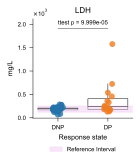

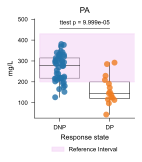

In [3]:
import matplotlib.patches as patches

a.set_param('group', dataset_type='continuous', group_name='Response state', file_type='category', thresh=.7, ttest_kwargs={'permutations': 10000, 'random_state': 94})

for term in ['LDH', 'PA']:
    ax = a.cate([term], category_type=['box', 'strip'], spines_hide=['right', 'top'], text_format='full', method='ttest', log_transform='no', ttest_kwargs={'permutations': 10000, 'random_state': 94})[0]
    ax.set_xlabel('Response state')

    normal_distribution = {'LDH': [120, 250], 'PA': [200, 430], 'ALP': [45, 125], 'CK_MB': [0, 3.88]}
    ax.set_ylabel('mg/L')
    rec = ax.add_patch(patches.Rectangle(xy=[-.4, normal_distribution[term][0]], width=2, height=normal_distribution[term][1]-normal_distribution[term][0], color='#f2cef4', alpha=.5))
    ax.legend(handles=[rec], labels=['Reference Interval'], frameon=False, loc='lower center', bbox_to_anchor=(.5, -.4))
    fig_pos = {'LDH': 'FigS4A', 'PA': 'Fig3B'}.get(term)
    ax.get_figure().savefig('../figure/figure3/{}_continuous_clinical_indicator_{}_cateplot.pdf'.format(fig_pos, term), bbox_inches='tight')

### Patient-wise comparision of LDH and PA between pre DBT and DP

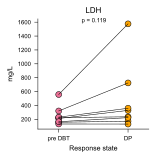

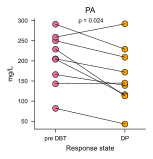

In [4]:
for term in ['LDH', 'PA']:
    tmp = a.category.loc[a.category['Response state iRECIST'].isin(['iCPD', 'iUPD', 'pre DBT']), ['Patient ID', 'Response state iRECIST']].replace(['iCPD', 'iUPD'], 'DP')
    tmp = pd.concat([tmp, a.continuous.loc[term]], axis=1).dropna()
    data = tmp[tmp['Patient ID'].duplicated(keep=False)]
    ax = lineplot(data.iloc[:, [1, 0, 2]], palette=['black']*(int(len(data)/2)), figsize=(2, 2), ticklabels_format=[], ticklabels_hide=[])
    ax = scatterplot(data.drop('Patient ID', axis=1).assign(hue=data['Response state iRECIST']).iloc[:, [0, -1, 1]], ax=ax, ticklabels_format=[], ticklabels_hide=[], palette=['#ed7096', 'orange'], edgecolor='black', linewidth=.5)

    group = data.groupby('Response state iRECIST', sort=False)[term]
    s, p = scipy.stats.ttest_rel(group.get_group('DP'), group.get_group('pre DBT'))
    ax.set_xlim([-.3, 1.3])
    ax.get_legend().remove()
    ax.set_title(term)
    ax.text(x=0.33, y=ax.get_ylim()[1]*.97, s='p = {:.3f}'.format(p), fontsize=6)
    ax.set_xlabel('Response state')
    ax.set_ylabel('mg/L')
    fig_pos = {'LDH': 'FigS4B', 'PA': 'Fig3C'}.get(term)

    ax.get_figure().savefig('../figure/figure3/{}_{}_pairwise_cateplot.pdf'.format(fig_pos, term), bbox_inches='tight')

### The distribution of FT3 and T3 between DNP and DP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


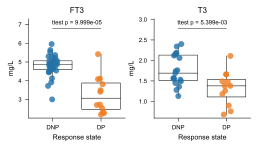

In [5]:
a.set_param('group', dataset_type='continuous', group_name='Response state', file_type='category', thresh=.7, ttest_kwargs={'permutations': 10000, 'random_state': 94})

fig, axs = plt.subplots(1, 2, figsize=(4, 1.8))
plt.subplots_adjust(wspace=.3)

for element, ax in zip(['FT3', 'T3'], axs):
    ax = a.cate([element], category_type=['box', 'strip'], spines_hide=['right', 'top'], text_format='full', method='ttest', log_transform='no', ax=ax, ttest_kwargs={'permutations': 10000, 'random_state': 94})[0]
    ax.set_xlabel('Response state')
    ax.set_ylabel('mg/L')
ax.get_figure().savefig('../figure/figure3/Fig3D_continuous_clinical_indicator_FT3-T3_cateplot.pdf', bbox_inches='tight')

### Correlation between PA and FT3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


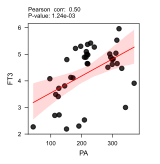

In [6]:
a.set_param('group', dataset_type='continuous', group_name='Response state', file_type='category', thresh=.7, ttest_kwargs={'permutations': 10000, 'random_state': 94})
data = a.merge_data_group(data_element=['PA', 'FT3'], data_type=['continuous']).rename(columns=lambda x: x.split('|')[0]).dropna().droplevel(0).astype(float)
ax = regplot(data, method='pearson', figsize=(2, 2))
ax.set_yticks(range(2, 7, 1))
ax.set_yticklabels(range(2, 7, 1))
ax.get_figure().savefig('../figure/figure3/Fig3E_continuous_clinical_indicator_PA-FT3_regplot.pdf', bbox_inches='tight')

### FT3 and lipid, glucose, neuron correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


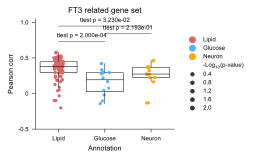

In [11]:
a.set_param('corr', name1='continuous', name2='ssgsea', element1='FT3', element2='all', group_name='Response state precise', algorithm='pearson', file_type='category')
lipid_related = a.ssgsea.filter(regex='LIPID|CHOLESTEROL|LIPO|FATTY', axis=0).index
glucose_related = a.ssgsea.filter(regex='GLU|CARBOHY|GLYCOLY|TCA|CITRATE|PYRU', axis=0).index
neuron_related = a.ssgsea.filter(regex='NEURON|AXON', axis=0).index

plotdata = pd.DataFrame()
for term, name in zip([lipid_related, glucose_related, neuron_related], ['Lipid', 'Glucose', 'Neuron']):
    plotdata = pd.concat([plotdata, a.corr_table.loc[term, ['pearson_corr', 'pearson_pvalues']].assign(Annotation=name)])

plotdata['-$\mathregular{Log_{10}}$(p-value)'] = -np.log10(plotdata['pearson_pvalues'])
plotdata['Annotation'] = plotdata['Annotation'].str.title()
ax = cateplot(plotdata.set_index(['Annotation'])['pearson_corr'], log_transform='no', category_type=['box'], text_format='full', title='FT3 related gene set', figsize=(2.5, 2), spines_hide=['top', 'right'], ttest_kwargs={'permutations': 10000, 'random_state': 94})
plotdata = plotdata.set_index(['Annotation'])[['pearson_corr', '-$\mathregular{Log_{10}}$(p-value)']].reset_index()
plotdata.insert(2, '', plotdata['Annotation'])
plotdata['Annotation'] = plotdata['Annotation'].map({'Lipid': 0, 'Glucose': 1, 'Neuron': 2})
plotdata['Annotation'] = plotdata['Annotation'] + scipy.stats.uniform(0, 0.2).rvs(len(plotdata)) - 0.1
ax = scatterplot(plotdata, palette=['#D86868', '#55B2FF', 'orange'], ax=ax, ticklabels_format=[], ticklabels_hide=[], sizes=(10, 15))
ax.set_yticks([-0.5, 0, .5, 1])
ax.set_yticklabels([-0.5, 0, .5, 1.0 ])
ax.set_ylabel('Pearson corr')
ax.get_figure().savefig('../figure/figure3/Fig3F_FT3_correlated_function_cateplot.pdf', bbox_inches='tight')

### LDH correlated pathways

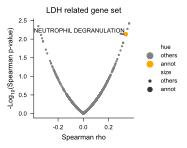

In [8]:
a.set_param('corr', name1='continuous', name2='ssgsea', element1='LDH', element2='all', group_name='Response state', algorithm='all')
plotdata = a.corr_table.sort_values('spearman_rho', ascending=False).iloc[:, [2, 3]]
plotdata['spearman_pvalues'] = -np.log10(plotdata['spearman_pvalues'])
highlight_points = ['REACTOME_NEUTROPHIL_DEGRANULATION']

plotdata.loc[highlight_points, 'hue'] = 'annot'
plotdata.loc[:, 'hue'] = plotdata.loc[:, 'hue'].fillna('others')
plotdata.loc[:, 'size'] = plotdata.loc[:, 'hue']
ax = scatterplot(plotdata, sizes=(20, 5), ticklabels_format=[], ticklabels_hide=[], title='LDH related gene set', palette=['grey', 'orange'], highlight_points=highlight_points)
ax.set_xlabel('Spearman rho')
ax.set_ylabel('-$\mathregular{Log_{10}}$(Spearman p-value)')
ax.get_figure().savefig('../figure/figure3/FigS4C_LDH_ssgsea_correlation_scatterplot.pdf', bbox_inches='tight')

### FT3 correlated subtype of lipids

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


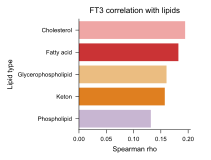

In [9]:
a.set_param('corr', name1='continuous', name2='ssgsea', element1='FT3', element2='all', group_name='Response state', algorithm='all')
plotdata = pd.DataFrame()
for name in ['Glycerophospholipid', 'Cholesterol', 'Keton', 'Fatty_acid', 'Sphingolipid', '_Phospholipid']:
    plotdata = pd.concat([plotdata, a.corr_table.filter(like=name.upper(), axis=0).assign(annot=name.replace('_', '').replace('acid', ' acid'))])
plotdata = plotdata.groupby('annot').mean()['spearman_rho']
ax = barplot(plotdata, MCMAP[4:len(plotdata)+4], orient='h', ticklabels_format=[], ticklabels_hide=[], figsize=(2, 2), title='FT3 correlation with lipids')
ax.set_ylabel('Lipid type')
ax.set_xlabel('Spearman rho')
ax.get_figure().savefig('../figure/figure3/FigS4D_FT3_correlated_lipid_barplot.pdf', bbox_inches='tight')